In [26]:
import pystan

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Building the most basic model in PyStan. PyStan requires `data`, `parameters` and `model`.

In [10]:
# Define the model - Stan code

stan_code = """
data {
    int n;
    int x;
}

parameters {
    real<lower=0, upper=1> p;
}

model {
    p ~ uniform(0, 1);
    x ~ binomial(n ,p);
}
"""

In [11]:
# Define the data
data_dict = dict(n = 30, x = 10)
data_dict

{'n': 30, 'x': 10}

In [12]:
model = pystan.stan(model_code = stan_code,
                    data       = data_dict)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_be79b8f9ad8679f7480c4cd9a8533447 NOW.
C:\Users\aleksander.molak\AppData\Local\Continuum\anaconda3\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\ALEKSA~1.MOL\AppData\Local\Temp\tmpc8pp6mri\stanfit4anon_model_be79b8f9ad8679f7480c4cd9a8533447_1962479625419630596.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [14]:
model

Inference for Stan model: anon_model_be79b8f9ad8679f7480c4cd9a8533447.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p      0.35  2.0e-3   0.08    0.2   0.29   0.34    0.4   0.51   1603    1.0
lp__ -21.07    0.02   0.65 -22.94 -21.25 -20.81 -20.64 -20.59   1900    1.0

Samples were drawn using NUTS at Thu Aug  8 11:06:22 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [27]:
posterior = model.extract()['p']

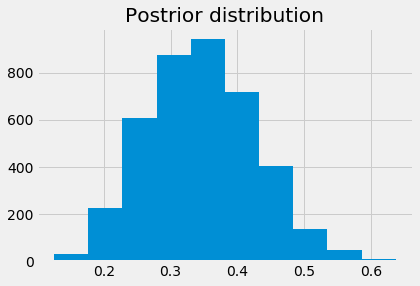

In [29]:
# Plot the posterior distribution
plt.hist(posterior)
plt.title('Posterior distribution')
plt.show()